In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import encode_label_dice, get_label_info
from PIL import Image

# Prototype encoding function

### This is what the image looks like

In [51]:
label_info = get_label_info("data/IDDA/class_dict.csv")

In [108]:
rgb = image = Image.open("data/IDDA/test/@277522.685@110569.687@Town10@ClearNoon@audi@1608238698@0.9997447110635136@1.0007584795349076@1.5735750198364258@160536@.jpg")

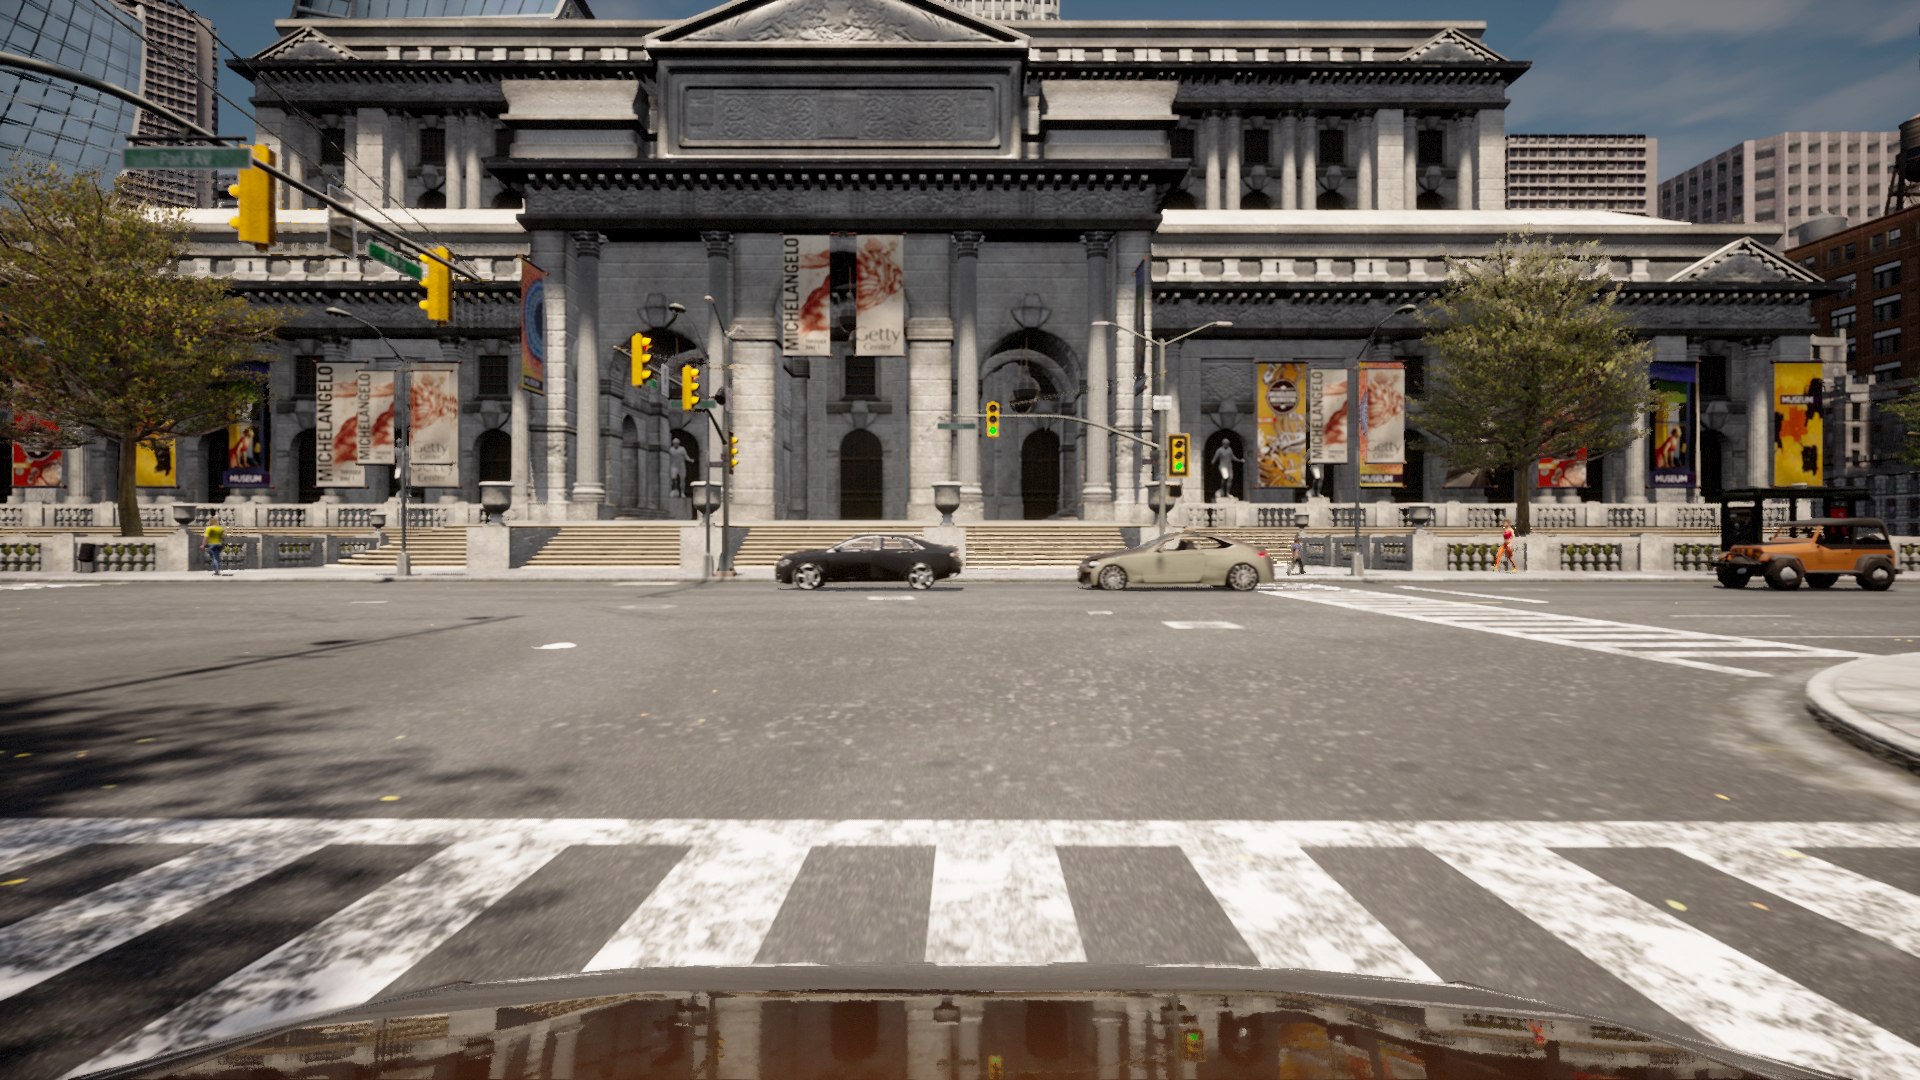

In [109]:
rgb

### And this is what the label looks like

In [146]:
label = Image.open("data/IDDA/test_labels/@277522.685@110569.687@Town10@ClearNoon@audi@1608238698@0.9997447110635136@1.0007584795349076@1.5735750198364258@160536@.png").convert('RGB')

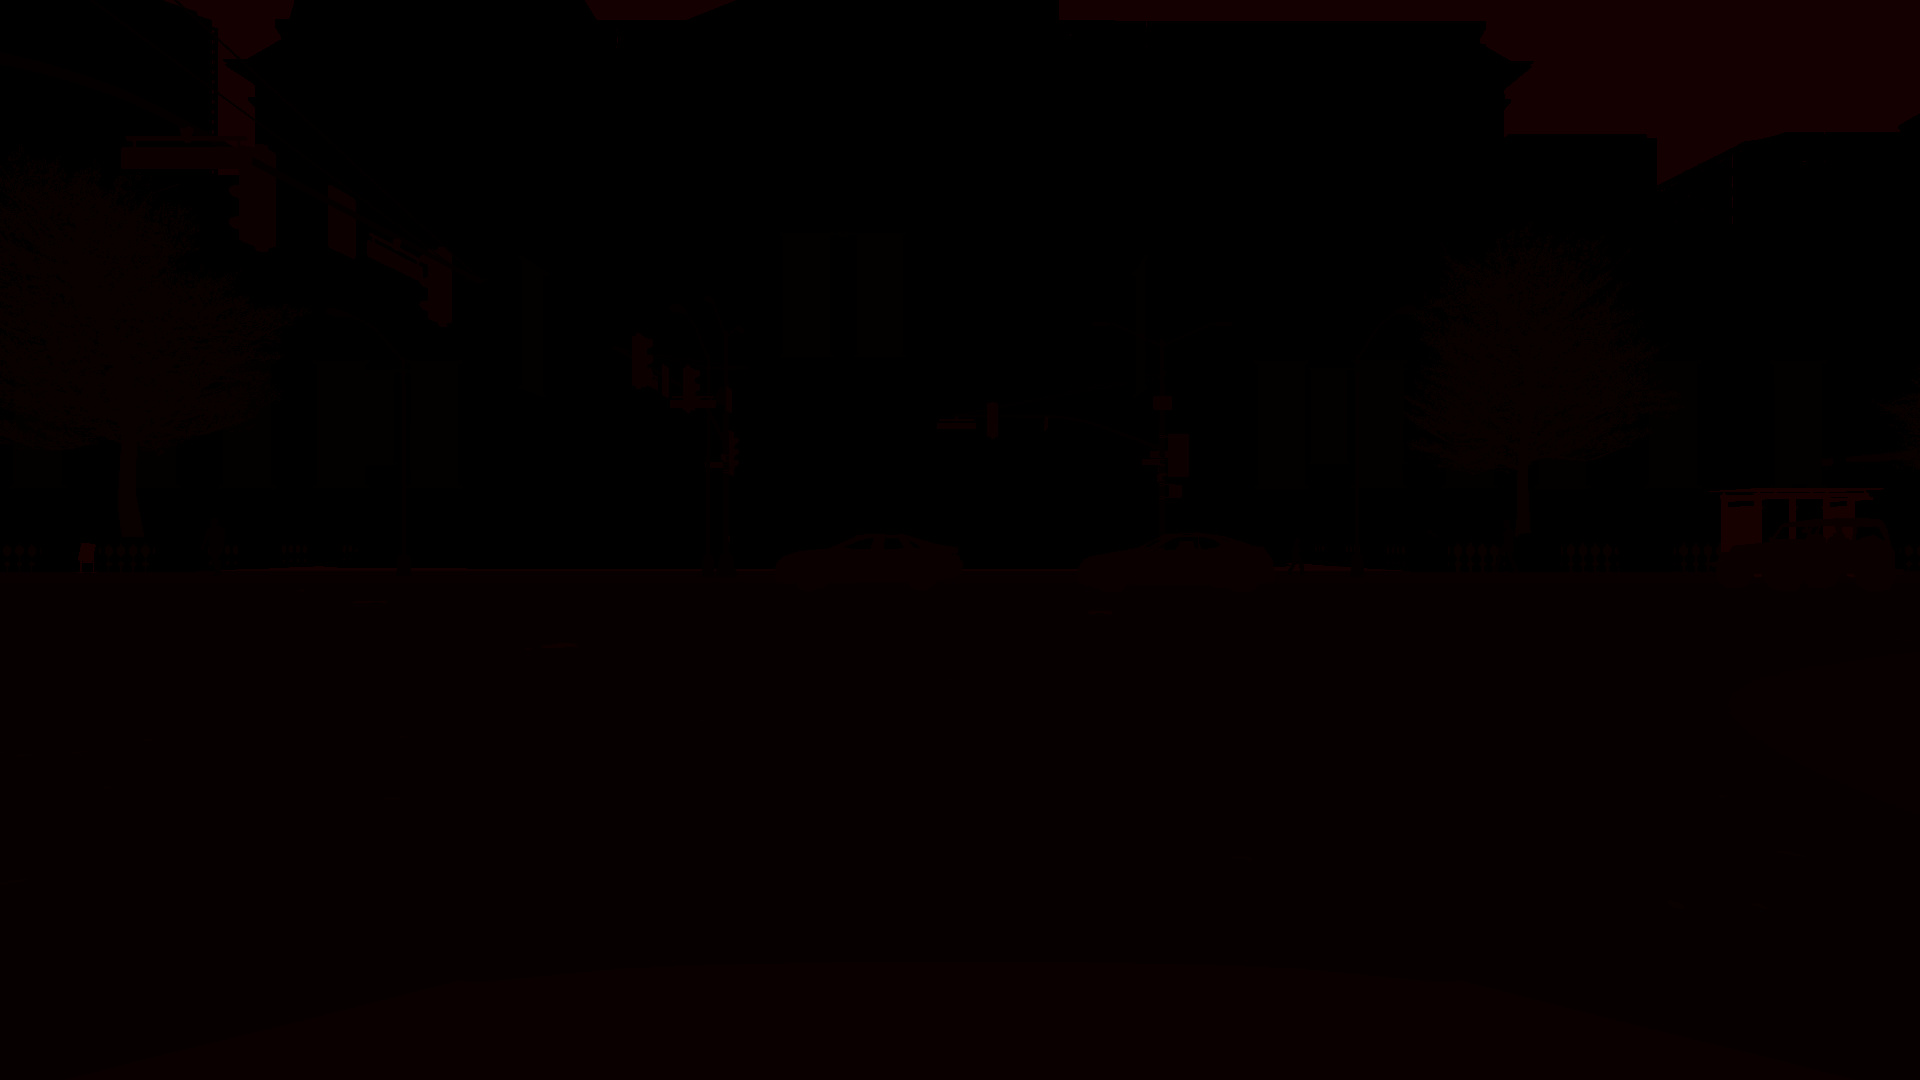

In [147]:
label

### We want to build a one-hot-encoded image that looks something like this, for each of the 11 classes

In [148]:
class_mask = np.equal(label, (1, 0, 0)).all(axis=2)

In [155]:
class_image = np.ones(class_mask.shape)*class_mask

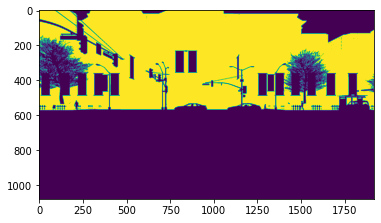

In [156]:
plt.imshow(class_image)

In [157]:
class_image

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### This is a first prototype of the encoding function

In [185]:
def encode_label_IDDA_dice(label):
    class_map = [11, 1, 4, 11, 5, 3, 6, 6, 7, 10, 2, 11, 8, 11, 11, 11, 0, 11, 11, 11, 9, 11, 11, 11, 1, 11, 11]
    
    # Convert PIL.Image to np.array
    label = np.array(label)

    # Build the first layer of the encoded image (void class)
    ohe_image = np.zeros(label.shape[:2] + (12,))
    
    idda_classes = 27
    
    for i in range(idda_classes):
        depth_class_color = (i, 0, 0)
        class_mask = np.equal(label, depth_class_color).all(axis=2)
        ohe_image[:,:,class_map[i]] += np.ones(class_mask.shape)*class_mask
        
    return ohe_image

### Let's test it

In [186]:
encoded_label = encode_label_IDDA_dice(image)

In [160]:
encoded_label.shape

(1080, 1920, 12)

In [161]:
encoded_label[:,:,1].nonzero()

(array([  0,   0,   0, ..., 571, 571, 571]),
 array([   0,    1,    2, ..., 1713, 1714, 1715]))

### Now let's visualize all the channels and see if they correspond to each class label

In [115]:
class_names = ["bycicle", "building", "car", "pole", "fence", "pedestrian", "road", "sidewalk", "tsign", "sky", "vegetation", "void"]

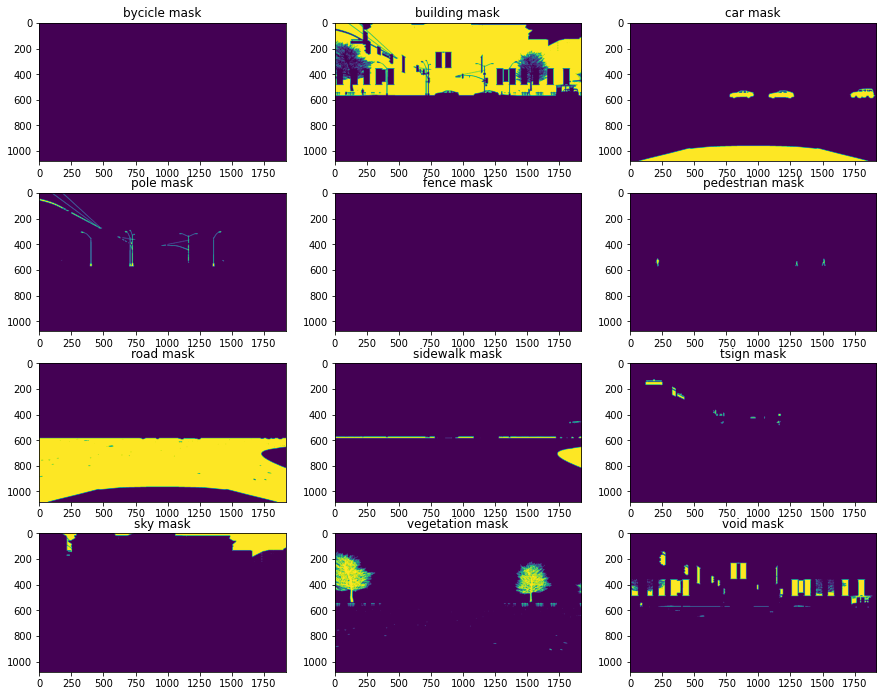

In [162]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
ax = ax.ravel()

for i, class_name in enumerate(class_names):
    ax[i].imshow(encoded_label[:, :, i])
    ax[i].set_title(f"{class_name} mask")
plt.show()

### Everything looks fine, let's check that indeed each pixel is labelled

In [163]:
(encoded_label.sum(axis=2)==0).any()

False

## Success :)

# Let's check a first encoded label from pre_encode_labels.py

In [191]:
filename = "data/IDDA/train_labels/@277340.761@110573.411@Town10@ClearNoon@audi@1608200215@0.9997773867748094@0.9991243107168336@1.248753547668457@126614@.npz"

encoded_label = np.load(filename)["a"]

In [192]:
encoded_label.shape

(1080, 1920, 12)

In [193]:
encoded_label.nonzero()

(array([   0,    0,    0, ..., 1079, 1079, 1079]),
 array([   0,    1,    2, ..., 1917, 1918, 1919]),
 array([8, 8, 8, ..., 6, 6, 6]))

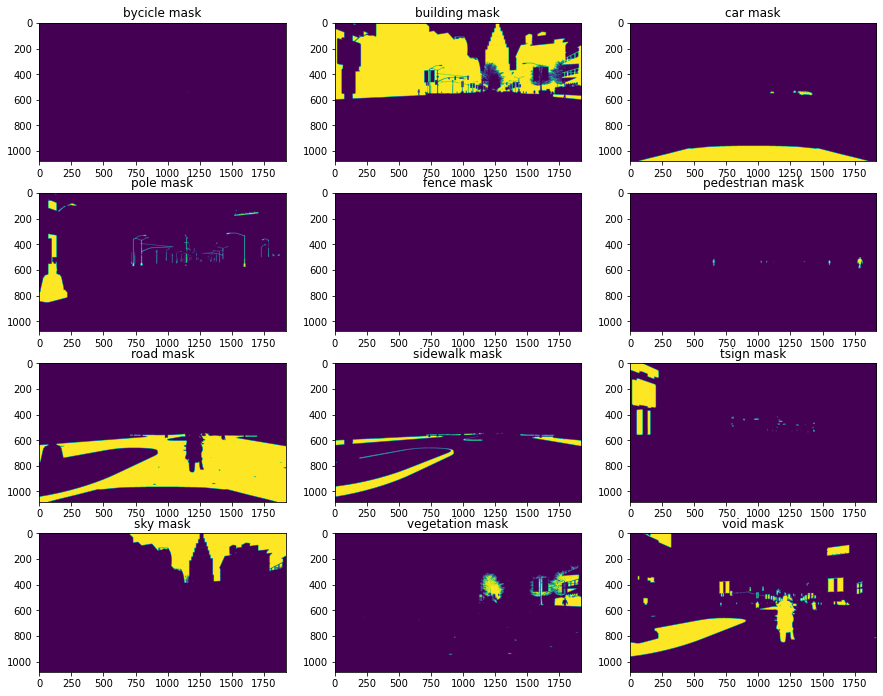

In [195]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
ax = ax.ravel()

for i, class_name in enumerate(class_names):
    ax[i].imshow(encoded_label[:, :, i])
    ax[i].set_title(f"{class_name} mask")
plt.show()

In [196]:
(encoded_label.sum(axis=2)==0).any()

False

## Check encodings for CamVid.py

In [198]:
filename = "data/CamVid/test_labels/0001TP_008550_L.npy"

encoded_label = np.load(filename)

In [199]:
encoded_label.shape

(12, 720, 960)

In [200]:
encoded_label.nonzero()

(array([ 0,  0,  0, ..., 11, 11, 11]),
 array([382, 382, 382, ..., 719, 719, 719]),
 array([268, 269, 270, ..., 957, 958, 959]))

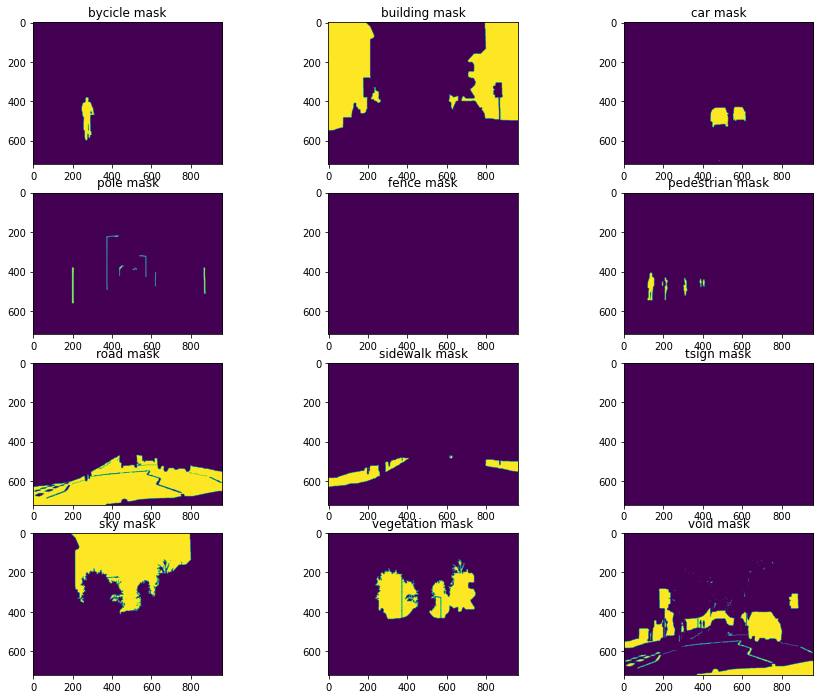

In [202]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
ax = ax.ravel()

for i, class_name in enumerate(class_names):
    ax[i].imshow(encoded_label[i, :, :])
    ax[i].set_title(f"{class_name} mask")
plt.show()

In [204]:
(encoded_label.sum(axis=0)==0).any()

False

## Check image-label file discrepancy

In [74]:
import glob

train_imgs = sorted(glob.glob("data/IDDA/train/*.jpg"))
train_lbls = sorted(glob.glob("data/IDDA/train_labels/*.npz"))
train_lbls_orig = sorted(glob.glob("data/IDDA/train_labels/*.png"))

test_imgs = sorted(glob.glob("data/IDDA/test/*.jpg"))
test_lbls = sorted(glob.glob("data/IDDA/test_labels/*.npz"))
test_lbls_orig = sorted(glob.glob("data/IDDA/test_labels/*.png"))

val_imgs = sorted(glob.glob("data/IDDA/val/*.jpg"))
val_lbls = sorted(glob.glob("data/IDDA/val_labels/*.npz"))
val_lbls_orig = sorted(glob.glob("data/IDDA/val_labels/*.png"))

In [75]:
print(len(train_imgs) == len(train_lbls) == len(train_lbls_orig))
print(len(test_imgs) == len(test_lbls) == len(test_lbls_orig))
print(len(val_imgs) == len(val_lbls) == len(val_lbls_orig))

True
True
True


In [76]:
len(train_imgs)

1690

In [77]:
len(train_lbls)

1690

In [78]:
len(train_lbls_orig)

1690

In [79]:
print(train_imgs[0].split("/")[-1])
print(train_lbls[0].split("/")[-1])
print(train_lbls_orig[0].split("/")[-1])
print("==========================")
print(train_imgs[-1].split("/")[-1])
print(train_lbls[-1].split("/")[-1])
print(train_lbls_orig[-1].split("/")[-1])

@277323.612@110521.433@Town10@ClearNoon@audi@1608415805@0.9993073186054318@0.9989705522184156@3.1451809406280518@320128@.jpg
@277323.612@110521.433@Town10@ClearNoon@audi@1608415805@0.9993073186054318@0.9989705522184156@3.1451809406280518@320128@.npz
@277323.612@110521.433@Town10@ClearNoon@audi@1608415805@0.9993073186054318@0.9989705522184156@3.1451809406280518@320128@.png
@277419.537@110662.255@Town10@ClearNoon@audi@1608359926@1.0005811212072615@0.9998314368480413@4.722804546356201@270276@.jpg
@277419.537@110662.255@Town10@ClearNoon@audi@1608359943@1.0005811212072615@0.9998314368480413@4.722804546356201@270291@.npz
@277419.537@110662.255@Town10@ClearNoon@audi@1608359943@1.0005811212072615@0.9998314368480413@4.722804546356201@270291@.png


In [80]:
print(val_imgs[0].split("@")[1:3])
print(val_lbls[0].split("@")[1:3])
print(val_lbls_orig[0].split("@")[1:3])
print("==========================")
print(val_imgs[-1].split("@")[1:3])
print(val_lbls[-1].split("@")[1:3])
print(val_lbls_orig[-1].split("@")[1:3])

['277419.599', '110658.777']
['277419.599', '110658.777']
['277419.599', '110658.777']
['277522.509', '110474.834']
['277522.509', '110474.834']
['277522.509', '110474.834']


In [81]:
print(test_imgs[0].split("@")[1])
print(test_lbls[0].split("@")[1])
print(test_lbls_orig[0].split("@")[1])
print("==========================")
print(test_imgs[-1].split("@")[1])
print(test_lbls[-1].split("@")[1])
print(test_lbls_orig[-1].split("@")[1])

277522.685
277522.685
277522.685
277548.275
277548.275
277548.275


# Imagenet Check

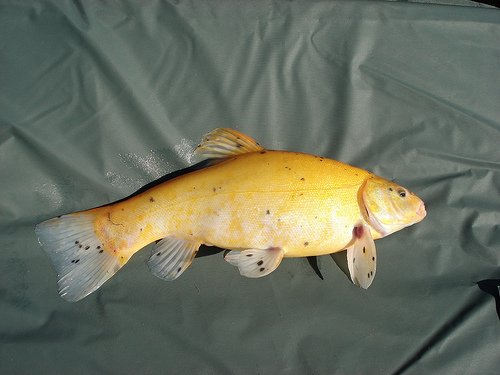

In [6]:
a = Image.open('../../../../../Downloads/n01440764_tench.jpeg')
a

In [8]:
np.array(a)/255

array([[[0.27843137, 0.32156863, 0.29803922],
        [0.2745098 , 0.30980392, 0.29803922],
        [0.28627451, 0.3254902 , 0.32156863],
        ...,
        [0.01568627, 0.01568627, 0.02352941],
        [0.01568627, 0.01568627, 0.02352941],
        [0.02352941, 0.02352941, 0.02352941]],

       [[0.26666667, 0.31372549, 0.29803922],
        [0.27058824, 0.31372549, 0.29803922],
        [0.28235294, 0.32941176, 0.32156863],
        ...,
        [0.01960784, 0.01568627, 0.00784314],
        [0.00784314, 0.00392157, 0.        ],
        [0.01176471, 0.00784314, 0.        ]],

       [[0.2627451 , 0.32156863, 0.30980392],
        [0.27058824, 0.31764706, 0.30980392],
        [0.2745098 , 0.33333333, 0.32156863],
        ...,
        [0.01960784, 0.01960784, 0.01176471],
        [0.02352941, 0.02352941, 0.01568627],
        [0.02352941, 0.02352941, 0.02352941]],

       ...,

       [[0.23137255, 0.27058824, 0.26666667],
        [0.23529412, 0.2745098 , 0.27843137],
        [0.23529412, 0

In [15]:
c = []

In [16]:
a = np.ones((720, 960, 3))
b = np.ones((720, 960, 3))

In [17]:
c.append(a)
c.append(b)

In [18]:
len(c)

2

In [19]:
c = np.stack(c)

In [20]:
c.shape

(2, 720, 960, 3)

In [28]:
np.mean(c, axis=(0, 1, 2)).shape

(3,)

# Visualizing CosineDecayLR

In [50]:
from torch.nn import Sequential, Linear
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR, CosineAnnealingWarmRestarts

import matplotlib.pyplot as plt

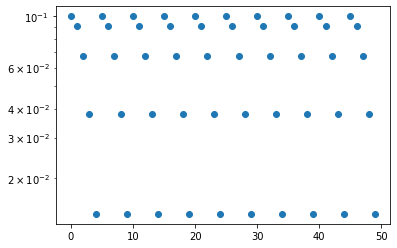

In [68]:
epochs = 50
lr = 0.1
model = Sequential(Linear(100, 10))
optimizer = SGD(model.parameters(), lr)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=1, eta_min=0.005)

lrs = []
for i in range(epochs):
    lrs.append(scheduler.state_dict()["_last_lr"])
    scheduler.step()
    
plt.scatter(range(epochs), lrs)
plt.yscale("log")
# plt.yrange([-1, 1])

In [69]:
lrs

[[0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.037821692767189996],
 [0.014071692767190003],
 [0.1],
 [0.09092830723281001],
 [0.06717830723281],
 [0.0378216927671899

## Pytorch manual random horizontal flip

In [6]:
from torchvision.transforms import functional as F
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
torch.rand(1) 

tensor([0.7982])

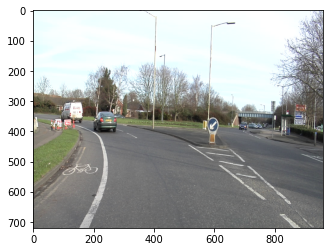

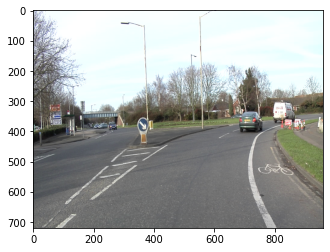

In [108]:
isflip = torch.rand(1) 
p = 0.6
img = Image.open('data/CamVid/train/0006R0_f00930.png')

plt.imshow(np.array(img))
plt.show()

if isflip < p:
    img = F.hflip(img)
    
plt.imshow(np.array(img))
plt.show()

# Tryout color distorsion

In [145]:
import cv2
import numpy as np
from torchvision.transforms import ColorJitter, RandomApply, RandomGrayscale, Compose, Resize, RandomCrop
import random

class RandomGaussianBlur(object):
    """
    Inspired by SwAV code on github (https://github.com/facebookresearch/swav/blob/master/src/multicropdataset.py)
    """

    def __call__(self, img):
        do_it = np.random.rand() > -1
        if do_it:
            sigma = np.random.rand() * 1.9 + 0.1
            img = cv2.GaussianBlur(np.asarray(img), (23, 23), sigma)

        return img


class ColorDistortion(object):
    """
    Inspired by SwAV code on github (https://github.com/facebookresearch/swav/blob/master/src/multicropdataset.py)
    """

    def __init__(self, strength=1.0):
        self.s = strength

    def __call__(self, img):
        color_jitter = ColorJitter(0.4 * self.s, 0.4 * self.s, 0.4 * self.s, 0.1 * self.s)
        rnd_color_jitter = RandomApply([color_jitter], p=0.8)
        rnd_gray = RandomGrayscale(p=0.2)
        color_distort = Compose([rnd_color_jitter, rnd_gray])
        a = color_distort(img)

        return a



In [146]:
transforms = Compose([ColorDistortion(), RandomGaussianBlur()])

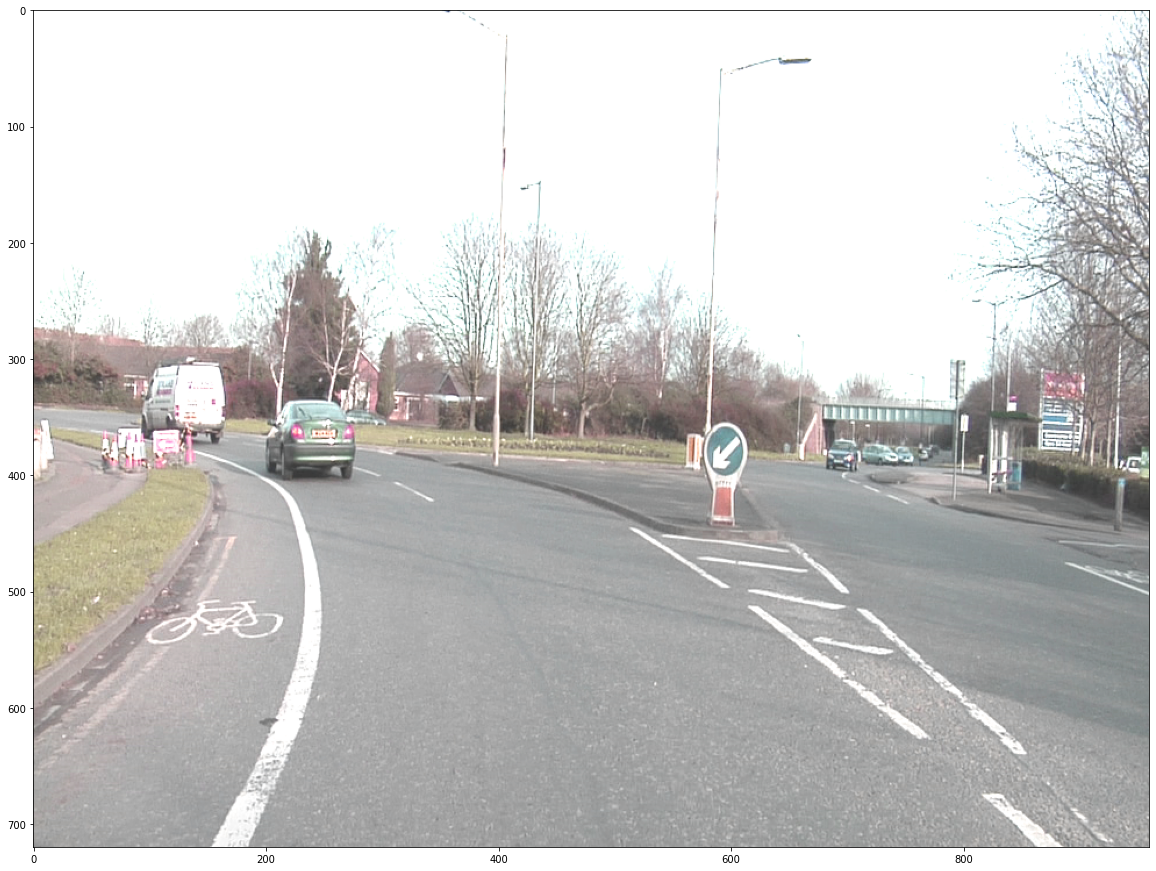

In [147]:
plt.figure(figsize=(20, 18))
plt.imshow(transforms(img))

In [148]:
a.shape

(720, 960, 3)

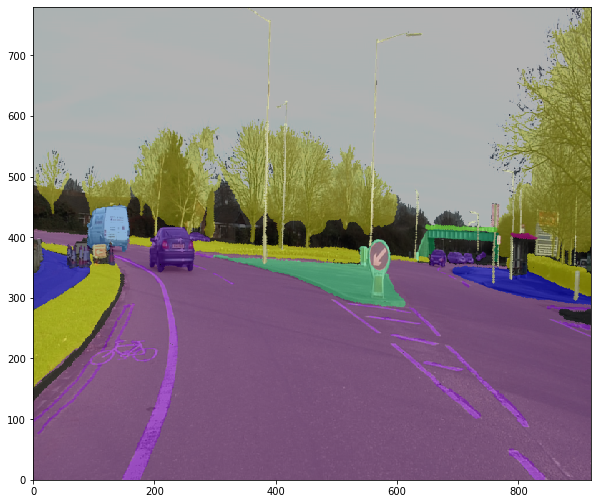

In [152]:
img = Image.open('data/CamVid/train/0006R0_f00930.png')
lbl = Image.open('data/CamVid/train_labels/0006R0_f00930_L.png')
seed = int(random.random())

img = Resize((920, 780))(img)
lbl = Resize((920, 780))(lbl)

img = RandomCrop((920, 780), seed, pad_if_needed=True)(image)
lbl = RandomCrop((920, 780), seed, pad_if_needed=True)(lbl)

extent = 0, 920, 0, 780
plt.figure(figsize = (10,10))
plt.imshow(np.array(img), interpolation='nearest', extent=extent)
plt.imshow(np.array(lbl), alpha=0.6, interpolation='nearest', extent=extent)
plt.show()



# Checking npz delays

In [8]:
import numpy as np
import h5py

In [13]:
lbl = np.load('data/IDDA/test_labels/@277522.685@110569.687@Town10@ClearNoon@audi@1608238698@0.9997447110635136@1.0007584795349076@1.5735750198364258@160536@.npz')['a']

In [14]:
lbl.shape

(1080, 1920, 12)

In [15]:
h5f = h5py.File('prova.h5', 'w')
h5f.create_dataset('label', data=lbl, chunks=True)
h5f.close()

In [16]:
h5f = h5py.File('prova.h5','r')
b = h5f['label'][:]
h5f.close()

# Checking dark images

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import Compose, Normalize, ToTensor, RandomCrop, Resize


normalize = Compose([
    ToTensor(),
    Normalize((0.39068785, 0.40521392, 0.41434407), (0.29652068, 0.30514979, 0.30080369)),
])

In [11]:
img_light = Image.open('data/CamVid/train/0006R0_f00930.png')
img_dark = Image.open('../../../../../Desktop/train_dusk/0001TP_006690.png')

In [27]:
img_ligh_norm = np.moveaxis(np.array(normalize(img_light)), 0, -1)
img_dark_norm = np.moveaxis(np.array(normalize(img_dark)), 0, -1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


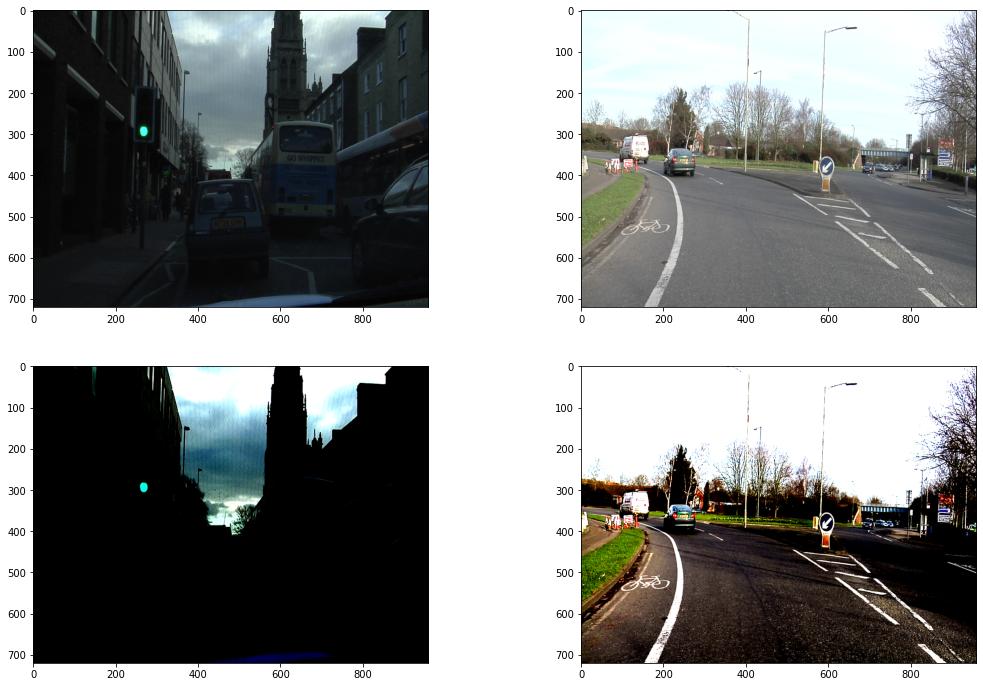

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
ax = ax.ravel()
ax[0].imshow(np.array(img_dark))
ax[1].imshow(np.array(img_light))
ax[2].imshow(np.array(img_dark_norm))
ax[3].imshow(np.array(img_ligh_norm))
plt.show()